# Experiment 5

This experiment investigates the convergence rates when $p = O(\sqrt{n})$, using saturated norm (using CDF).

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [4]:
ps = np.arange(4,41)
p_true = max(ps)
ns = np.floor(0.4*ps**2)
n_true = 50000
n_experiments = 150
λ = 3
δ = 0.2

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [5]:
np.array([ps,ns]).T

array([[   4.,    6.],
       [   5.,   10.],
       [   6.,   14.],
       [   7.,   19.],
       [   8.,   25.],
       [   9.,   32.],
       [  10.,   40.],
       [  11.,   48.],
       [  12.,   57.],
       [  13.,   67.],
       [  14.,   78.],
       [  15.,   90.],
       [  16.,  102.],
       [  17.,  115.],
       [  18.,  129.],
       [  19.,  144.],
       [  20.,  160.],
       [  21.,  176.],
       [  22.,  193.],
       [  23.,  211.],
       [  24.,  230.],
       [  25.,  250.],
       [  26.,  270.],
       [  27.,  291.],
       [  28.,  313.],
       [  29.,  336.],
       [  30.,  360.],
       [  31.,  384.],
       [  32.,  409.],
       [  33.,  435.],
       [  34.,  462.],
       [  35.,  490.],
       [  36.,  518.],
       [  37.,  547.],
       [  38.,  577.],
       [  39.,  608.],
       [  40.,  640.]])

In [6]:
# True market
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized market
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [7]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [8]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [9]:
# Results placeholder
qs = np.zeros(shape=(len(ns),p_true+1,n_experiments))
CEs_ins = np.empty(shape=(len(ns),n_experiments))
CEs_oos = np.empty(shape=(len(ns),n_experiments))

In [11]:
# About 8minutes running time.
for i,(n,p) in enumerate(zip(ns,ps)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf,problem_t=pr.SaturatedNormMaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs[i,:p+1,:] = prs.qs.T
    CEs_ins[i,:] = prs.CEs_ins
    CEs_oos[i,:] = prs.CEs_oos

Sampling 150 problems of size 640 × 41
Sampling 150 problems of size 608 × 40
Sampling 150 problems of size 577 × 39
Sampling 150 problems of size 547 × 38
Sampling 150 problems of size 518 × 37
Sampling 150 problems of size 490 × 36
Sampling 150 problems of size 462 × 35
Sampling 150 problems of size 435 × 34
Sampling 150 problems of size 409 × 33
Sampling 150 problems of size 384 × 32
Sampling 150 problems of size 360 × 31
Sampling 150 problems of size 336 × 30
Sampling 150 problems of size 313 × 29
Sampling 150 problems of size 291 × 28
Sampling 150 problems of size 270 × 27
Sampling 150 problems of size 250 × 26
Sampling 150 problems of size 230 × 25
Sampling 150 problems of size 211 × 24
Sampling 150 problems of size 193 × 23
Sampling 150 problems of size 176 × 22
Sampling 150 problems of size 160 × 21
Sampling 150 problems of size 144 × 20
Sampling 150 problems of size 129 × 19
Sampling 150 problems of size 115 × 18
Sampling 150 problems of size 102 × 17
Sampling 150 problems of 

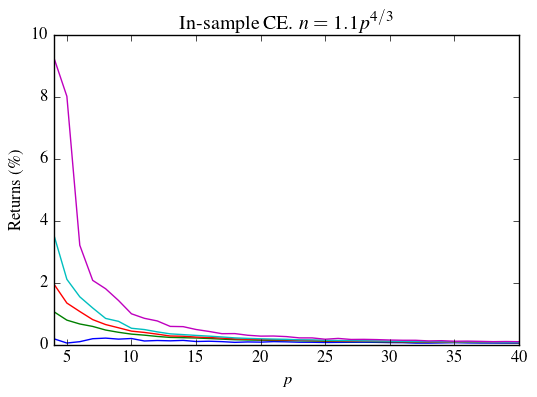

In [12]:
plt.plot(*five_stats(CEs_ins,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)')
plt.axis(xmin=4)
plt.title('In-sample CE. $n = 1.1p^{4/3}$');

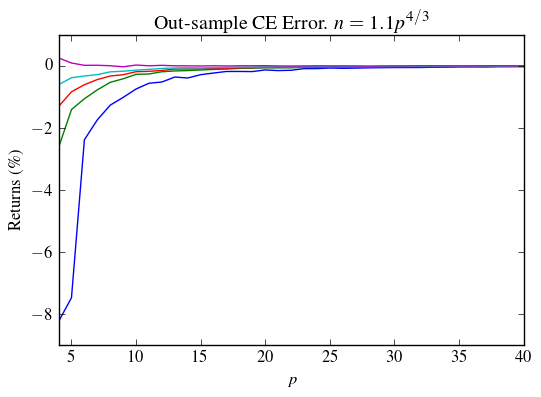

In [13]:
plt.plot(*five_stats(CEs_oos-CEs_ins,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)')
plt.axis(xmin=4)
plt.title('Out-sample CE Error. $n = 1.1p^{4/3}$');

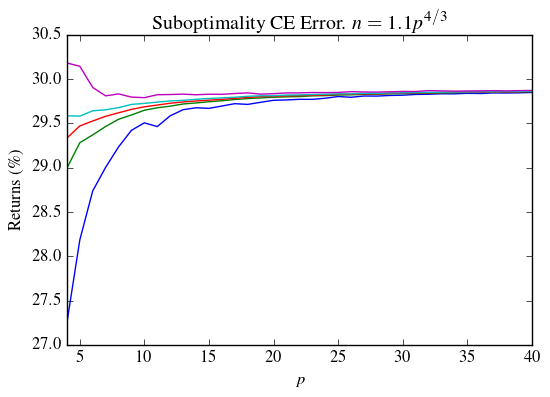

In [14]:
plt.plot(*five_stats(CE_star_q_star - CEs_oos,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)');
plt.axis(xmin=4)
plt.title('Suboptimality CE Error. $n = 1.1p^{4/3}$');